## Project

#Regression focussed on Data. Determine the target_deathrate as a function of rest of the variables. The data has both categorical and numerical data which needs to be handled.


#Import Necessary libraries and the data to have an initial look at the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import *

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv('cancer_reg.csv')
pd.options.display.max_columns = None
df.head(5)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
df.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


##Data Cleaning
#How much of the data is missing.

In [4]:
df.isnull().sum().sort_values(ascending=False).head()

pctsomecol18_24            2285
pctprivatecoveragealone     609
pctemployed16_over          152
geography                     0
medianagefemale               0
dtype: int64

In [5]:
df.shape

(3047, 33)

#since most of the data in 'pctsomecol18_24' is missing. we can safely remove the column

In [6]:
df.drop(['pctsomecol18_24'], axis = 1, inplace = True)
df.isnull().sum().sort_values(ascending=False).head()

pctprivatecoveragealone    609
pctemployed16_over         152
birthrate                    0
geography                    0
medianagefemale              0
dtype: int64

In [7]:
#Fill the rest of the missing values with mean of the column
df=df.fillna(df.mean())
df.isnull().sum().sort_values(ascending=False).head()

birthrate               0
pctmarriedhouseholds    0
avgdeathsperyear        0
target_deathrate        0
incidencerate           0
dtype: int64

In [8]:
#Check for highly cvorrelated features and drop them

In [9]:
df.corr()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
avganncount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,-0.122844,-0.106108,-0.143327,-0.182054,0.284176,-0.311375,0.321021,0.197981,-0.009016,0.132244,0.166674,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgdeathsperyear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,-0.144069,-0.181029,-0.136794,-0.151418,0.259761,-0.295929,0.293210,0.125015,0.069701,0.056183,0.112221,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
target_deathrate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,0.012048,-0.266820,0.088463,0.261976,-0.287817,0.404589,-0.485477,-0.397487,0.378412,-0.386066,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidencerate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,-0.009106,-0.119524,-0.170762,0.022644,0.046835,0.121725,-0.038177,0.004622,0.099979,0.105174,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medincome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,-0.153278,0.355123,-0.289383,-0.190006,0.492810,-0.471348,0.704928,0.676307,-0.453108,0.724175,0.706956,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popest2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,-0.177932,-0.160463,-0.126582,-0.151821,0.248375,-0.311849,0.297463,0.139571,0.050768,0.052677,0.121365,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertypercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,-0.148164,-0.642857,0.288106,0.094211,-0.387122,0.194361,-0.531600,-0.719972,0.655148,-0.822534,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studypercap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,-0.030577,-0.038143,-0.090387,-0.057035,0.063819,-0.085128,0.108594,0.087669,-0.031957,0.092545,0.068599,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
medianage,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,0.124678,0.046372,0.006178,0.050574,-0.016909,0.036587,-0.020352,-0.023598,0.018590,0.004665,-0.021466,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
medianagemale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,0.933696,0.449986,0.100486,0.241310,-0.034135,0.318277,-0.131599,-0.161204,-0.142737,0.082232,-0.147824,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


In [10]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
print(to_drop)



['avgdeathsperyear', 'popest2015', 'medianagefemale']


In [11]:
# Drop features 
df.drop(['avgdeathsperyear', 'popest2015'], axis=1, inplace=True)



In [12]:
# We also see that medincome falls in the categorical variable binnedinc. so we can remove the column
df.drop(['binnedinc'], axis=1, inplace=True)

In [13]:
#instead of dropping 'medianagefemale' we can take the mean of the two columns and convert it into single column
medianage=['medianagefemale', 'medianagemale']
df['medianage']=df[medianage].astype(float).mean(axis=1)
df.drop(medianage, 1,  inplace=True)
df.head(5)

,avganncount,target_deathrate,incidencerate,medincome,povertypercent,studypercap,medianage,geography,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,164.9,489.8,61898,11.2,499.748204,39.30,"Kitsap County, Washington",52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,161.3,411.6,48127,18.6,23.111234,32.95,"Kittitas County, Washington",44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,174.7,349.7,49348,14.6,47.560164,44.90,"Klickitat County, Washington",54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,194.8,430.4,44243,17.1,342.637253,42.80,"Lewis County, Washington",52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,144.4,350.1,49955,12.5,0.000000,48.35,"Lincoln County, Washington",57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [14]:
#Dealing with Categorical Variables.



In [15]:
categorical=[]
for i in df.columns:
    if df[i].dtype =='object':
        categorical.append(i)
numerical=[item for item in list(df.columns) if item not in categorical]

In [16]:
df.geography.value_counts(ascending=False)

Noble County, Oklahoma               1
Kankakee County, Illinois            1
Forsyth County, North Carolina       1
Thayer County, Nebraska              1
Beauregard Parish, Louisiana         1
                                    ..
Garland County, Arkansas             1
Skagit County, Washington            1
Washington County, North Carolina    1
Gunnison County, Colorado            1
Telfair County, Georgia              1
Name: geography, Length: 3047, dtype: int64

In [17]:
#Since there onec class for each instance this feature gives zero importance to the model. So we take only the state names into consideration.

In [18]:
state = df["geography"].str.split(",", n = 1, expand = True)
df['state']=state[1]
df.drop(['geography'], axis = 1, inplace = True)

In [19]:
df['state'].value_counts()

 Texas                   233
 Georgia                 155
 Virginia                125
 Kentucky                120
 Missouri                115
 Kansas                  102
 Illinois                102
 North Carolina           99
 Iowa                     99
 Tennessee                95
 Indiana                  92
 Ohio                     87
 Minnesota                87
 Michigan                 83
 Mississippi              82
 Nebraska                 80
 Oklahoma                 77
 Arkansas                 75
 Wisconsin                72
 Pennsylvania             67
 Florida                  66
 Louisiana                64
 Alabama                  63
 New York                 62
 Colorado                 60
 South Dakota             59
 California               57
 West Virginia            55
 North Dakota             51
 Montana                  48
 South Carolina           46
 Idaho                    42
 Washington               39
 Oregon                   36
 New Mexico   

In [20]:
#Change state name to other if its value count is less than some threshold to be decided.
s = df['state'].value_counts()
df['state'] = np.where(df['state'].isin(s.index[s >= 29]), df['state'], 'Other')                                               

In [21]:
df['state'].value_counts()

 Texas             233
Other              220
 Georgia           155
 Virginia          125
 Kentucky          120
 Missouri          115
 Kansas            102
 Illinois          102
 Iowa               99
 North Carolina     99
 Tennessee          95
 Indiana            92
 Ohio               87
 Minnesota          87
 Michigan           83
 Mississippi        82
 Nebraska           80
 Oklahoma           77
 Arkansas           75
 Wisconsin          72
 Pennsylvania       67
 Florida            66
 Louisiana          64
 Alabama            63
 New York           62
 Colorado           60
 South Dakota       59
 California         57
 West Virginia      55
 North Dakota       51
 Montana            48
 South Carolina     46
 Idaho              42
 Washington         39
 Oregon             36
 New Mexico         32
Name: state, dtype: int64

In [22]:
#Using dummies to encode Categorical features.
categorical.append('state')
categorical.remove('geography')
categorical

['state']

In [23]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, categorical):
    for x in categorical:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [24]:
df = dummy_df(df, categorical)
print(df.head(5))

   avganncount  target_deathrate  incidencerate  medincome  povertypercent  \
0       1397.0             164.9          489.8      61898            11.2   
1        173.0             161.3          411.6      48127            18.6   
2        102.0             174.7          349.7      49348            14.6   
3        427.0             194.8          430.4      44243            17.1   
4         57.0             144.4          350.1      49955            12.5   

   studypercap  medianage  percentmarried  pctnohs18_24  pcths18_24  \
0   499.748204      39.30            52.5          11.5        39.5   
1    23.111234      32.95            44.5           6.1        22.4   
2    47.560164      44.90            54.2          24.0        36.6   
3   342.637253      42.80            52.7          20.2        41.2   
4     0.000000      48.35            57.8          14.9        43.0   

   pctbachdeg18_24  pcths25_over  pctbachdeg25_over  pctemployed16_over  \
0              6.9          2

In [25]:
df.shape

(3047, 62)

In [26]:
# Dealing with Outliers

In [27]:
from scipy import stats
z = np.abs(stats.zscore(df[numerical]))
print(np.where(z > 3))

(array([  13,   20,   21,   29,   30,   45,   45,   89,   91,   97,  103,
        112,  115,  115,  116,  118,  123,  139,  139,  139,  139,  146,
        146,  147,  148,  149,  150,  151,  151,  151,  151,  153,  155,
        155,  157,  159,  160,  161,  164,  165,  165,  165,  173,  173,
        174,  175,  175,  175,  175,  176,  176,  176,  176,  176,  176,
        179,  180,  183,  186,  187,  189,  190,  193,  193,  193,  193,
        193,  193,  201,  209,  209,  209,  209,  209,  229,  242,  244,
        244,  252,  252,  252,  252,  253,  254,  255,  255,  255,  259,
        259,  259,  259,  259,  259,  259,  260,  260,  263,  263,  264,
        269,  270,  270,  270,  270,  270,  271,  273,  273,  273,  274,
        274,  281,  281,  281,  283,  291,  292,  293,  294,  295,  299,
        299,  299,  333,  346,  350,  365,  377,  383,  386,  386,  392,
        392,  392,  393,  393,  393,  393,  393,  393,  418,  430,  444,
        461,  462,  463,  463,  466,  468,  471,  

In [28]:
df = df[(z < 3).all(axis=1)]

In [29]:
df.shape

(2558, 62)

In [30]:
df.describe()

,avganncount,target_deathrate,incidencerate,medincome,povertypercent,studypercap,medianage,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,state_ Alabama,state_ Arkansas,state_ California,state_ Colorado,state_ Florida,state_ Georgia,state_ Idaho,state_ Illinois,state_ Indiana,state_ Iowa,state_ Kansas,state_ Kentucky,state_ Louisiana,state_ Michigan,state_ Minnesota,state_ Mississippi,state_ Missouri,state_ Montana,state_ Nebraska,state_ New Mexico,state_ New York,state_ North Carolina,state_ North Dakota,state_ Ohio,state_ Oklahoma,state_ Oregon,state_ Pennsylvania,state_ South Carolina,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_Other
count,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000
mean,480.686021,179.480923,450.596286,46576.688038,16.391751,98.028413,41.210946,52.470289,17.932134,35.294371,5.851994,35.543901,12.922088,54.346188,7.632134,64.916888,48.596320,41.459187,36.342299,19.011181,86.187566,7.779877,0.927648,1.544226,51.761280,5.543480,0.019547,0.027365,0.013292,0.016810,0.021501,0.048475,0.014464,0.032838,0.035184,0.036357,0.031665,0.039093,0.023065,0.030493,0.030884,0.022283,0.042611,0.014464,0.027756,0.006255,0.019937,0.035575,0.013683,0.032838,0.028929,0.013292,0.024629,0.014855,0.018374,0.032838,0.075450,0.038311,0.011337,0.020328,0.024629,0.060594
std,714.076726,24.571012,46.514636,9802.190378,5.395733,235.036341,4.855904,5.809146,7.212804,8.491386,3.590859,6.473353,4.644072,7.324382,2.960787,9.532895,8.156445,8.760450,7.116457,5.370890,12.654188,11.672845,1.173019,2.013108,5.503581,1.679211,0.138463,0.163177,0.114543,0.128584,0.145076,0.214810,0.119419,0.178248,0.184280,0.187212,0.175142,0.193854,0.150139,0.171972,0.173036,0.147631,0.202019,0.119419,0.164305,0.078856,0.139813,0.185263,0.116192,0.178248,0.167639,0.114543,0.155021,0.120998,0.134325,0.178248,0.264167,0.191984,0.105891,0.141149,0.155021,0.238631
min,7.000000,104.600000,287.400000,26336.000000,4.300000,0.000000,26.200000,32.300000,0.800000,8.000000,0.000000,14.900000,3.900000,31.200000,0.400000,32.600000,23.200000,15.000000,16.000000,5.700000,36.967124,0.000000,0.000000,0.000000,33.347702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.000000,163.425000,424.425000,39629.500000,12.200000,0.000000,38.250000,48.700000,12.900000,29.900000,3.200000,31.225000,9.400000,49.400000,5.600000,58.225000,43.500000,35.200000,31.300000,15.100000,80.707840,0.620757,0.260552,0.289535,48.275116,4.518957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [31]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.drop('target_deathrate', 1)
y = df.target_deathrate


In [32]:
X.head(5)

,avganncount,incidencerate,medincome,povertypercent,studypercap,medianage,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,state_ Alabama,state_ Arkansas,state_ California,state_ Colorado,state_ Florida,state_ Georgia,state_ Idaho,state_ Illinois,state_ Indiana,state_ Iowa,state_ Kansas,state_ Kentucky,state_ Louisiana,state_ Michigan,state_ Minnesota,state_ Mississippi,state_ Missouri,state_ Montana,state_ Nebraska,state_ New Mexico,state_ New York,state_ North Carolina,state_ North Dakota,state_ Ohio,state_ Oklahoma,state_ Oregon,state_ Pennsylvania,state_ South Carolina,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_Other
0,1397.0,489.8,61898,11.2,499.748204,39.30,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,173.0,411.6,48127,18.6,23.111234,32.95,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,102.0,349.7,49348,14.6,47.560164,44.90,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,427.0,430.4,44243,17.1,342.637253,42.80,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,57.0,350.1,49955,12.5,0.000000,48.35,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
y.head(5)

0    164.9
1    161.3
2    174.7
3    194.8
4    144.4
Name: target_deathrate, dtype: float64

In [34]:
X1=X.copy()
X1['target_deathrate']=y
X1.head(5)

,avganncount,incidencerate,medincome,povertypercent,studypercap,medianage,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,state_ Alabama,state_ Arkansas,state_ California,state_ Colorado,state_ Florida,state_ Georgia,state_ Idaho,state_ Illinois,state_ Indiana,state_ Iowa,state_ Kansas,state_ Kentucky,state_ Louisiana,state_ Michigan,state_ Minnesota,state_ Mississippi,state_ Missouri,state_ Montana,state_ Nebraska,state_ New Mexico,state_ New York,state_ North Carolina,state_ North Dakota,state_ Ohio,state_ Oklahoma,state_ Oregon,state_ Pennsylvania,state_ South Carolina,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_Other,target_deathrate
0,1397.0,489.8,61898,11.2,499.748204,39.30,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,164.9
1,173.0,411.6,48127,18.6,23.111234,32.95,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,161.3
2,102.0,349.7,49348,14.6,47.560164,44.90,54.2,24.0,36.6,9.5,29.0,16.0,45.9,7.0,63.7,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,174.7
3,427.0,430.4,44243,17.1,342.637253,42.80,52.7,20.2,41.2,2.5,31.6,9.3,48.3,12.1,58.4,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,194.8
4,57.0,350.1,49955,12.5,0.000000,48.35,57.8,14.9,43.0,2.0,33.4,15.0,48.2,4.8,61.6,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,144.4


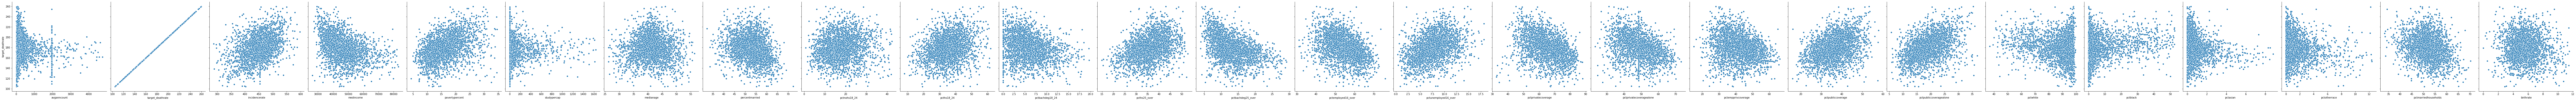

In [35]:
import seaborn as sns
sns.pairplot(X1[numerical], y_vars='target_deathrate', x_vars=X1[numerical].columns.values, height=5.5)

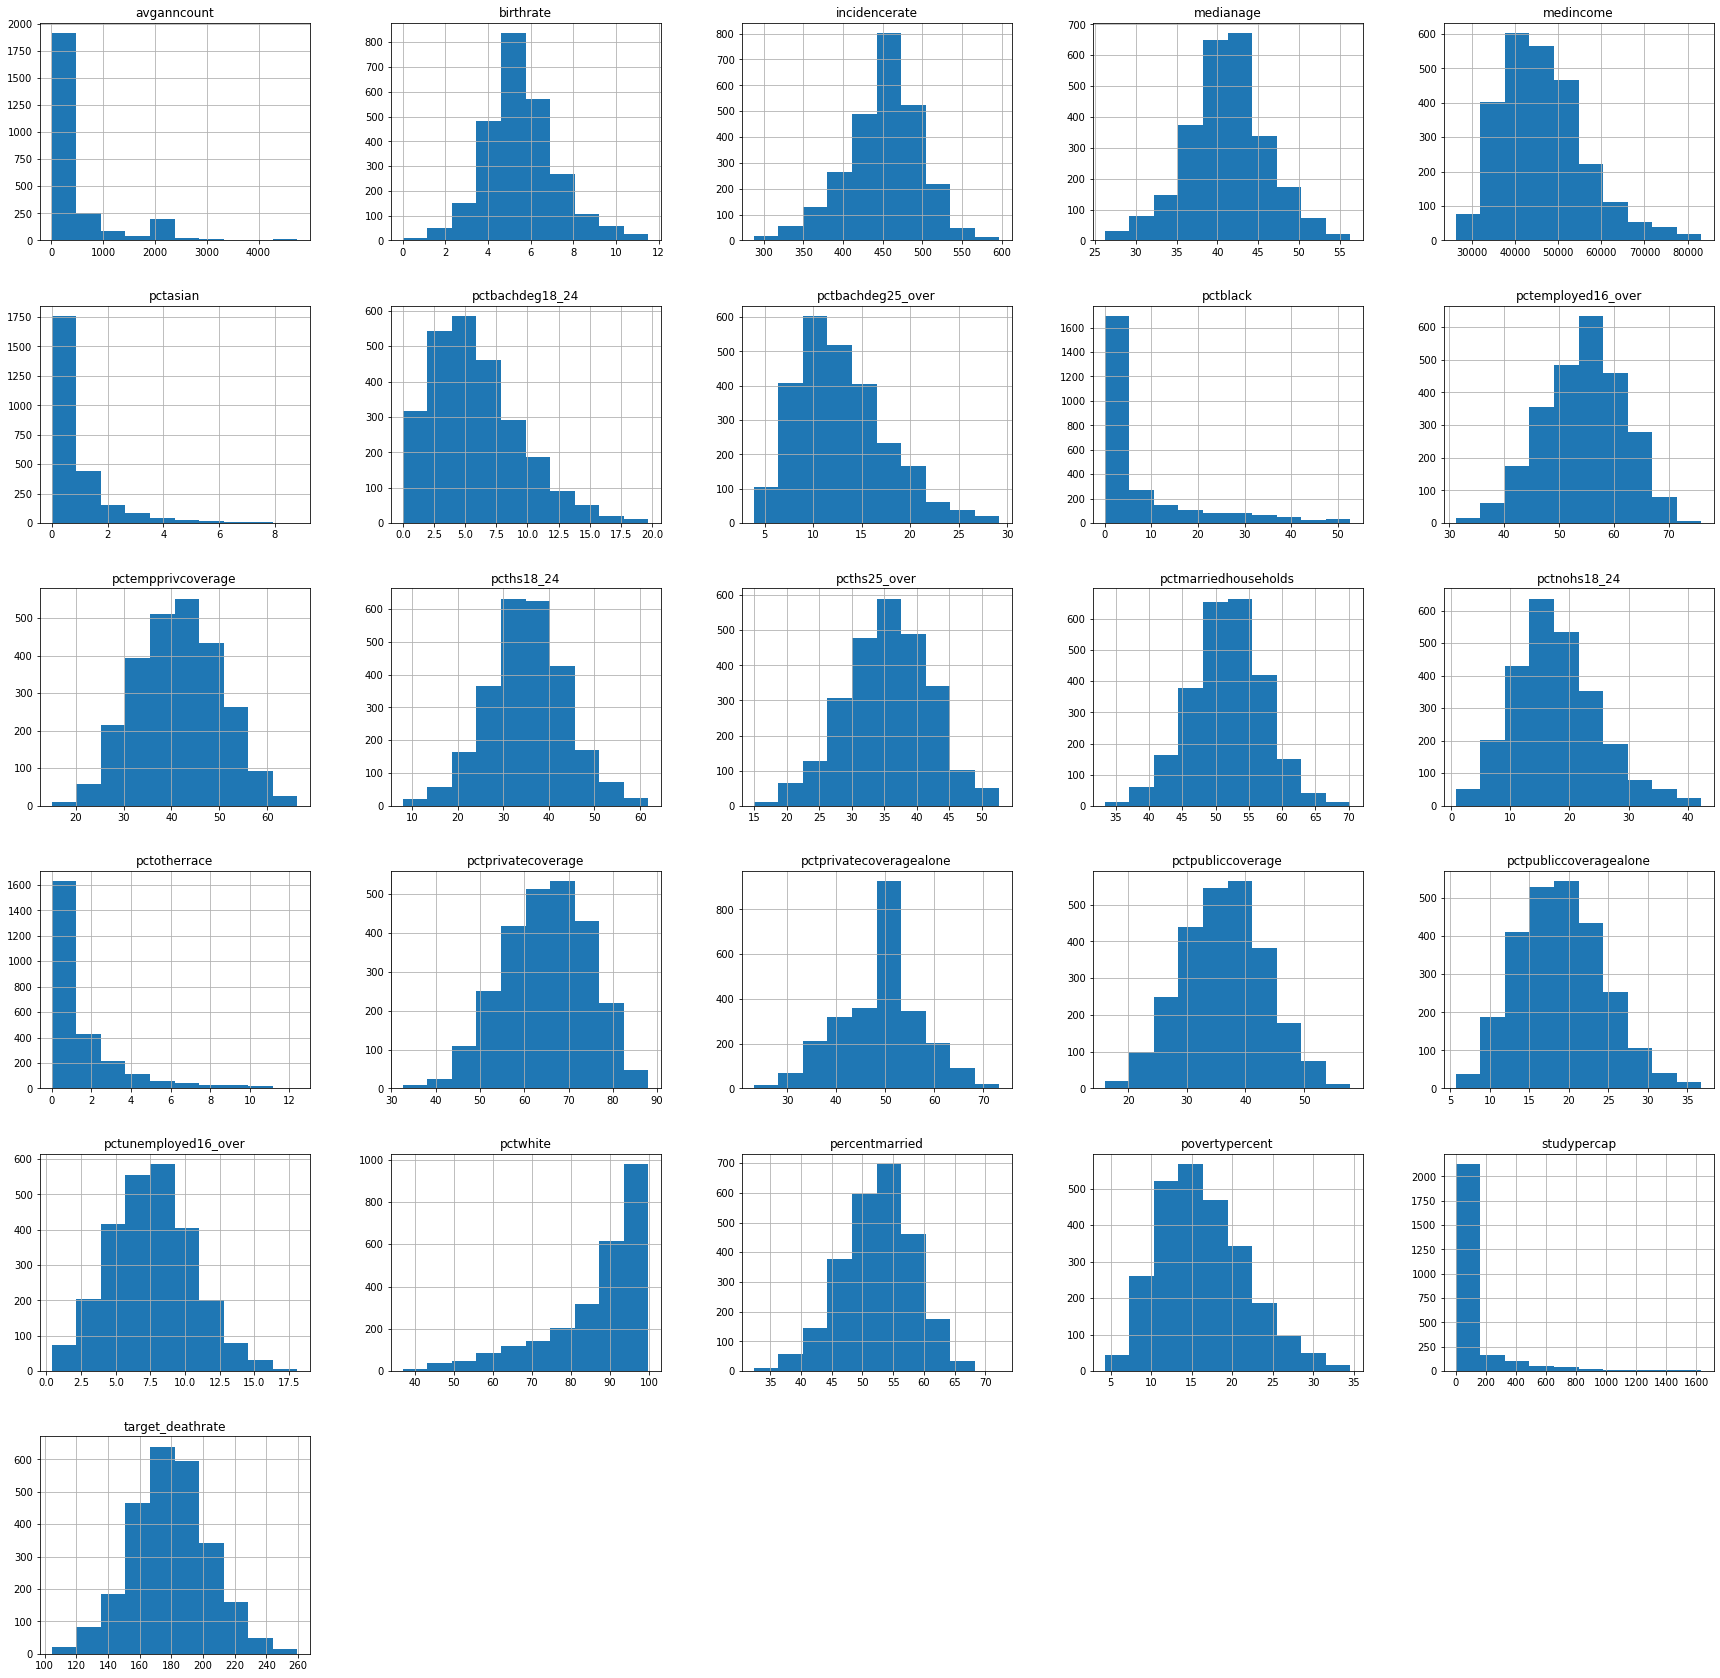

In [36]:
X1[numerical].hist(figsize=(30, 30));


In [37]:
#Check for outliers.


In [38]:
for i in X.columns:
    X[i]=((X[i]-X[i].min())/(X[i].max()-X[i].min()))*20

X.head()

,avganncount,incidencerate,medincome,povertypercent,studypercap,medianage,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,state_ Alabama,state_ Arkansas,state_ California,state_ Colorado,state_ Florida,state_ Georgia,state_ Idaho,state_ Illinois,state_ Indiana,state_ Iowa,state_ Kansas,state_ Kentucky,state_ Louisiana,state_ Michigan,state_ Minnesota,state_ Mississippi,state_ Missouri,state_ Montana,state_ Nebraska,state_ New Mexico,state_ New York,state_ North Carolina,state_ North Dakota,state_ Ohio,state_ Oklahoma,state_ Oregon,state_ Pennsylvania,state_ South Carolina,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_Other
0,5.862505,13.079160,12.516102,4.554455,6.116808,8.704319,10.10,5.156627,11.710037,7.005076,4.391534,12.411067,9.261745,8.587571,15.342960,10.081347,10.370370,8.066826,5.337621,14.253904,0.985077,10.958107,2.974485,10.568647,10.624516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0
1,0.700127,8.025848,7.669377,9.438944,0.282876,4.485050,6.10,2.554217,5.353160,7.614213,5.873016,14.861660,11.051454,8.361582,13.574007,12.215569,11.150097,7.207637,6.173633,16.622900,0.367915,5.104767,6.036737,6.514425,7.523830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0
2,0.400675,4.025848,8.099110,6.798680,0.582126,12.425249,10.95,11.180723,10.631970,9.644670,7.460317,9.565217,6.577181,7.457627,11.227437,8.103792,7.758285,12.458234,9.903537,17.161613,0.280814,1.058796,4.432911,11.429374,6.475747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0
3,1.771404,9.240711,6.302397,8.448845,4.193805,11.029900,10.20,9.349398,12.342007,2.538071,8.835979,4.268775,7.651007,13.220339,9.314079,6.826347,7.797271,13.985680,12.411576,17.423227,0.297120,2.639293,2.198649,9.574774,7.993942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0
4,0.210881,4.051696,8.312744,5.412541,0.000000,14.717608,12.75,6.795181,13.011152,2.030457,9.788360,8.774704,7.606264,4.971751,10.469314,8.263473,7.836257,13.365155,10.932476,18.173667,0.102577,1.513160,0.794069,11.203243,11.801469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0


In [39]:
X1=X.copy()
X1['target_deathrate']=y
X1.head(5)

,avganncount,incidencerate,medincome,povertypercent,studypercap,medianage,percentmarried,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,state_ Alabama,state_ Arkansas,state_ California,state_ Colorado,state_ Florida,state_ Georgia,state_ Idaho,state_ Illinois,state_ Indiana,state_ Iowa,state_ Kansas,state_ Kentucky,state_ Louisiana,state_ Michigan,state_ Minnesota,state_ Mississippi,state_ Missouri,state_ Montana,state_ Nebraska,state_ New Mexico,state_ New York,state_ North Carolina,state_ North Dakota,state_ Ohio,state_ Oklahoma,state_ Oregon,state_ Pennsylvania,state_ South Carolina,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_Other,target_deathrate
0,5.862505,13.079160,12.516102,4.554455,6.116808,8.704319,10.10,5.156627,11.710037,7.005076,4.391534,12.411067,9.261745,8.587571,15.342960,10.081347,10.370370,8.066826,5.337621,14.253904,0.985077,10.958107,2.974485,10.568647,10.624516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,164.9
1,0.700127,8.025848,7.669377,9.438944,0.282876,4.485050,6.10,2.554217,5.353160,7.614213,5.873016,14.861660,11.051454,8.361582,13.574007,12.215569,11.150097,7.207637,6.173633,16.622900,0.367915,5.104767,6.036737,6.514425,7.523830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,161.3
2,0.400675,4.025848,8.099110,6.798680,0.582126,12.425249,10.95,11.180723,10.631970,9.644670,7.460317,9.565217,6.577181,7.457627,11.227437,8.103792,7.758285,12.458234,9.903537,17.161613,0.280814,1.058796,4.432911,11.429374,6.475747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,174.7
3,1.771404,9.240711,6.302397,8.448845,4.193805,11.029900,10.20,9.349398,12.342007,2.538071,8.835979,4.268775,7.651007,13.220339,9.314079,6.826347,7.797271,13.985680,12.411576,17.423227,0.297120,2.639293,2.198649,9.574774,7.993942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,194.8
4,0.210881,4.051696,8.312744,5.412541,0.000000,14.717608,12.75,6.795181,13.011152,2.030457,9.788360,8.774704,7.606264,4.971751,10.469314,8.263473,7.836257,13.365155,10.932476,18.173667,0.102577,1.513160,0.794069,11.203243,11.801469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,144.4


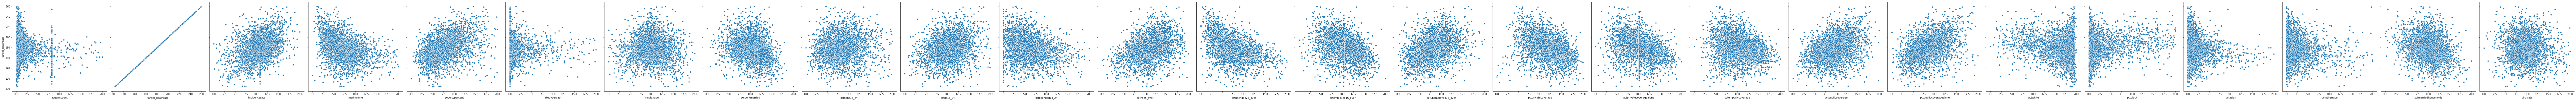

In [40]:
sns.pairplot(X1[numerical], y_vars="target_deathrate", x_vars=X1[numerical].columns.values, height=5.5)

In [41]:
#dividing the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [42]:
def scores(y_test, y_pred):
    print('explained_variance_score:' ,explained_variance_score(y_test, y_pred))
    print('mean_squared_error:',mean_squared_error(y_test, y_pred))
    print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))
    print('max_error',max_error(y_test, y_pred))
    print('regressor_score:',regressor.score(X_test,y_test))
    print('r2_score:',r2_score(y_test,y_pred))
    

In [43]:
def plots(y_test, y_pred):
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()
    

In [44]:
# Implement classifiers based on Simple linear Regression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

y_pred =regressor.predict(X_test)

In [45]:
scores(y_test, y_pred)

explained_variance_score: 0.4801579571635526
mean_squared_error: 294.576286729079
mean_absolute_error: 12.816414571005916
max_error 82.7642578125
regressor_score: 0.47910017817787953
r2_score: 0.47910017817787953


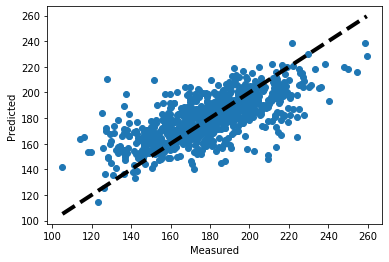

In [46]:
plots(y_test, y_pred)

In [47]:
regressor=Ridge()
regressor.fit(X_train,y_train)

y_pred =regressor.predict(X_test)

In [48]:
# As seen above Ridge model fits the data better than other models. Lets tune it and see if we can improve it further.
param_grid = {"alpha": [0.1, 0.3, 0.5 ,0.7, 0.9, 1],
              "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
              }

from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(regressor, param_grid, cv=5)

grid_cv.fit(X_train,y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
print("Best Hyperparameters::\n{}".format(grid_cv.best_params_))

Best Hyperparameters::
{'alpha': 1, 'solver': 'lsqr'}


In [50]:
regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='lsqr', tol=0.001)
regressor.fit(X_train,y_train)

y_pred =regressor.predict(X_test)

In [51]:
scores(y_test, y_pred)

explained_variance_score: 0.4795670085454137
mean_squared_error: 294.91383618576583
mean_absolute_error: 12.822935224700434
max_error 82.75037141647587
regressor_score: 0.4785032888158854
r2_score: 0.47850328881588533


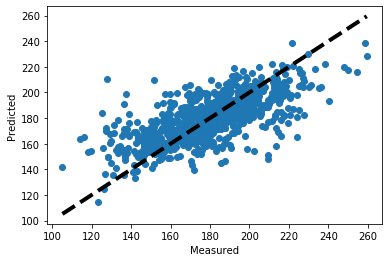

In [52]:
plots(y_test, y_pred)

In [53]:
regressor=Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
regressor.fit(X_train,y_train)

y_pred =regressor.predict(X_test)

In [54]:
scores(y_test, y_pred)

explained_variance_score: 0.4782640760504385
mean_squared_error: 295.6540286519091
mean_absolute_error: 12.85738212731124
max_error 81.11086112467467
regressor_score: 0.4771944050356961
r2_score: 0.4771944050356961


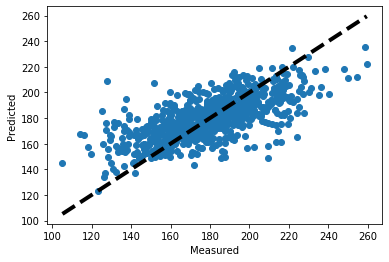

In [55]:
plots(y_test, y_pred)

In [56]:
regressor=SVR(kernel='poly',epsilon=1.0)
regressor.fit(X_train,y_train)

y_pred =regressor.predict(X_test)

In [57]:
scores(y_test, y_pred)

explained_variance_score: 0.4642952262519119
mean_squared_error: 303.79575507836824
mean_absolute_error: 13.131847479006378
max_error 71.56666462273924
regressor_score: 0.4627973743311591
r2_score: 0.4627973743311591


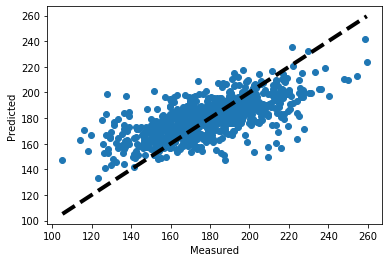

In [58]:
plots(y_test, y_pred)

In [59]:
##END